문서 유사도 - 코사인 유사도

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

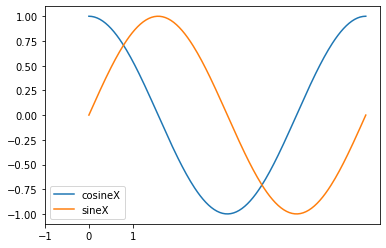

In [4]:
# 코사인 유사도 설명에 앞서 사인, 코사인 함수 그래프 그리기
xs = np.linspace(0, 2*np.pi, 200)
cosx = np.cos(xs)
sinx = np.sin(xs)

plt.plot(xs, cosx, label = 'cosineX')
plt.plot(xs, sinx, label = 'sineX')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
plt.xticks([-1, 0,1])
plt.legend()
plt.show()

In [6]:
# 벡터 계산을 위해 norm 값 정의
v1, v2, v3 = np.array([1,1,0]), np.array([2, 1, 0]), np.array([0, 0, 1])
v1_norm = np.sqrt(np.sum(np.square(v1)))
v2_norm = np.sqrt(np.sum(np.square(v2)))
v3_norm = np.sqrt(np.sum(np.square(v3)))
v1_norm, v2_norm, v3_norm

(1.4142135623730951, 2.23606797749979, 1.0)

In [8]:
# v1과 v2의 유사도, v1과 v3의 유사도 (1에 가까울수록 유사도가 높다)
cos12 = np.dot(v1, v2) / (v1_norm * v2_norm)
cos13 = np.dot(v1, v3) / (v1_norm * v3_norm)
cos12 , cos13

(0.9486832980505138, 0.0)

In [9]:
# 코사인 유사도 함수
def cos_similarity(v1,v2):
    v1_norm = np.sqrt(np.sum(np.square(v1)))
    v2_norm = np.sqrt(np.sum(np.square(v2)))
    return np.dot(v1, v2) / (v1_norm * v2_norm)

 - 문장의 코사인 유사도

In [10]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']


- CountVectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
doc_cv = cv.fit_transform(doc_list)
doc_cv.toarray()

array([[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2]])

In [14]:
d1, d2, d3 = doc_cv.toarray()
d1

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1])

In [16]:
print(f'문장1 vs 문장2:{cos_similarity(d1,d2):.4f}')
print(f'문장1 vs 문장3:{cos_similarity(d1,d3):.4f}')
print(f'문장2 vs 문장3:{cos_similarity(d2,d3):.4f}')

문장1 vs 문장2:0.6093
문장1 vs 문장3:0.6396
문장2 vs 문장3:0.6804


 - TfidfVectorizer

In [27]:
tv = TfidfVectorizer()
doc_tv = cv.fit_transform(doc_list)
doc_tv.toarray()

array([[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2]])

In [31]:
d1, d2, d3 = doc_tv.toarray()

In [32]:
print(f'문장1 vs 문장2: {cos_similarity(d1,d2):.4f}')
print(f'문장1 vs 문장3: {cos_similarity(d1,d3):.4f}')
print(f'문장2 vs 문장3: {cos_similarity(d2,d3):.4f}')

문장1 vs 문장2: 0.6093
문장1 vs 문장3: 0.6396
문장2 vs 문장3: 0.6804


 - sklearn 코사인 유사도

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
cosine_similarity([d1],[d2])

array([[0.6092718]])

In [25]:
cosine_similarity(doc_cv)

array([[1.        , 0.6092718 , 0.63960215],
       [0.6092718 , 1.        , 0.68041382],
       [0.63960215, 0.68041382, 1.        ]])

In [26]:
cosine_similarity(doc_tv, doc_tv)

array([[1.        , 0.6092718 , 0.63960215],
       [0.6092718 , 1.        , 0.68041382],
       [0.63960215, 0.68041382, 1.        ]])